In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data=data.dropna()
print(data.shape)
print(list(data.head()))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<AxesSubplot:>

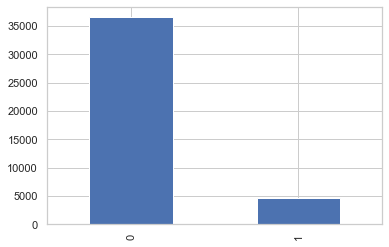

In [7]:
data['y'].value_counts().plot(kind="bar")

In [9]:
df=pd.get_dummies(data,drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)

In [27]:
X_scaled=scalar.fit_transform(X)

In [19]:
X_test_scaled=scalar.transform(X_test)

In [ ]:
X_train.head()

In [10]:
X=df.drop('y',axis=1)
y=df['y']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
y_train.shape

(32950,)

In [21]:
logreg=LogisticRegression(max_iter=400)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=400)

In [22]:
y_pred=logreg.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
print(score)

0.9065307113377034


In [29]:
log=LogisticRegression(max_iter=200)
rfe=RFE(log,20)
rfe=rfe.fit(X_scaled,y)
print(rfe.support_)
print(rfe.ranking_)

c:\users\91832\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[False  True  True  True False  True  True  True  True False  True False
 False False False False False False False False False False False False
 False False False False False  True False  True  True False False False
 False  True  True False False  True  True  True  True False False  True
 False False False  True  True]
[30  1  1  1  8  1  1  1  1 11  1  7 28 24  2  9  6  4 27 29 26 33 10 32
 15 34 16 17 13  1 14  1  1 25 31 23 22  1  1 21  5  1  1  1  1 20 19  1
 18 12  3  1  1]


In [36]:
cols=[]
for i,j in zip(X.columns,rfe.ranking_):
    if j==1:
        cols.append(i)

In [37]:
cols

['duration',
 'campaign',
 'pdays',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'job_blue-collar',
 'education_university.degree',
 'default_unknown',
 'default_yes',
 'contact_telephone',
 'month_aug',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_nonexistent',
 'poutcome_success']

In [38]:
X_new=X[cols]
X_new.shape

(41188, 20)

In [40]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_new_scaled=scalar.fit_transform(X_new)
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new_scaled,y,test_size=0.3)
lognew=LogisticRegression(max_iter=200)
lognew.fit(X_train_new,y_train_new)

LogisticRegression(max_iter=200)

In [41]:
y_pred_new=lognew.predict(X_test_new)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_new,y_test_new)
print(score)

0.9128429230395727
